In [1]:
using IntervalArithmetic,IntervalBoxes,IntervalArithmetic.Symbols,Plots

In [2]:
function T(y)
    local x = 0.5;
    return 2*(√(x^2 + (1-y)^2)/√(2*g*(1-y)) + √((1-x)^2 + y^2)/(√(2*g*(1-y)) + √(2*g)))
end

T (generic function with 1 method)

In [3]:
function calculate_branch_bound(f, X, N)
    interval_lists = [[X]]
    m = mid(X)

    upper_bound = sup(f(X...))
    upper_bounds = [upper_bound]

    working_list = [X]

    for i in 1:N
        X = popfirst!(working_list)

        upper_bound = min(upper_bound, sup(f(interval(mid(X))...)))

        if inf(f(X...)) <= upper_bound
            if diam(X) > 0.0001
                X1, X2 = bisect(X)
                push!(working_list, X1, X2)
            
            else
                push!(working_list, X)

            end
        end

        push!(interval_lists, copy(working_list))
        push!(upper_bounds, upper_bound)
    end

    return interval_lists, upper_bounds
end

calculate_branch_bound (generic function with 1 method)

ymid = [0.199188232421875, 0.199249267578125, 0.199310302734375, 0.199371337890625, 0.199432373046875, 0.199493408203125, 0.199554443359375, 0.199615478515625, 0.199676513671875, 0.199737548828125, 0.199798583984375, 0.199859619140625, 0.199920654296875, 0.199981689453125, 0.200042724609375, 0.200103759765625, 0.200164794921875, 0.200225830078125, 0.200286865234375, 0.200347900390625, 0.200408935546875, 0.200469970703125, 0.200531005859375, 0.200592041015625, 0.200653076171875, 0.200714111328125, 0.200775146484375, 0.200836181640625, 0.200897216796875, 0.200958251953125, 0.201019287109375, 0.201080322265625, 0.201141357421875, 0.201202392578125, 0.201263427734375, 0.201324462890625, 0.201385498046875, 0.201446533203125, 0.201507568359375, 0.201568603515625, 0.201629638671875, 0.201690673828125, 0.201751708984375, 0.201812744140625, 0.201873779296875, 0.201934814453125, 0.201995849609375, 0.202056884765625, 0.202117919921875, 0.202178955078125, 0.202239990234375, 0.202301025390625, 0.20

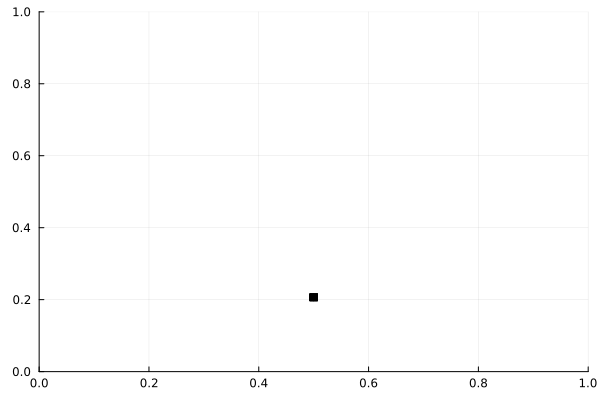

In [13]:
I = 2000
g = 9.8
# Find global minima
interval_lists, minimas = calculate_branch_bound(T, 0..1, I)
# At the last splitting
Ys = interval_lists[I + 1]
# Mean
ymid = mid.(Ys)
# Radius
yrad = diam.(Ys)/2
# Plot
@show(ymid)
@show(Ys)
@show(minimas)
plot(0.5*ones(size(ymid)), ymid, yerror=yrad, legend=false, ylimits=(0,1), xlimits=(0,1))